# Fashion MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each training and test example is assigned to one of the following labels:

<table>
  <thead>
      <tr>
        <th>Label</th>
        <th>Description</th>
      </tr>
  </thead>
  <tbody>

  </tbody>
      <tr><td>0</td> <td>T-shirt/top</td></tr>
      <tr><td>1</td> <td>Trouser</td></tr>
      <tr><td>2</td> <td>Pullover</td></tr>
      <tr><td>3</td> <td>Dress</td></tr>
      <tr><td>4</td> <td>Coat</td></tr>
      <tr><td>5</td> <td>Sandal</td></tr>
      <tr><td>6</td> <td>Shirt</td></tr>
      <tr><td>7</td> <td>Sneaker</td></tr>
      <tr><td>8</td> <td> Bag</td></tr>
      <tr><td>9</td> <td> Ankle boot</td></tr>
<table>
<br>
<hr>

## Methodology

<p>I will create two models both from scratch and I will randomly select hyperparameters for the first model and check how it performs on this dataset. Then i will use the SkLearn's RandomizedSearchCV to obtain the best values of hyperparameters to use with my CNN model. I will try to figure out only two hyperparameters i.e. number of kernels to use in the Conv2D layer and the value for dropout in the Dropout layer and I will use only one Dropout layer after the Flatten layer.</p>

<p>I have used the keras padding layer to add zero padding to the input images to improve the results of the convolution and I have used the rescaling layer to rescale my images to [0.0, 1.0] range.</p>

<p>I have used the regularization to regularize weights in the final two Dense layers. All of these measures were taken so that the model does not overfits the data. I have not implemented the augmentation to images which could be done to further reduce the overfitting threat.</p>


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from keras.utils.vis_utils import plot_model

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000,)
(10000,)


In [ ]:
class_labels = {0: "T-shirt/top",
                1: "Trouser",
                2: "Pullover",
                3: "Dress",
                4: "Coat",
                5: "Sandal",
                6: "Shirt",
                7: "Sneaker",
                8: "Bag",
                9: "Ankle boot"
}

In [ ]:
train_labels = tf.keras.utils.to_categorical(y_train)
test_labels = tf.keras.utils.to_categorical(y_test)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

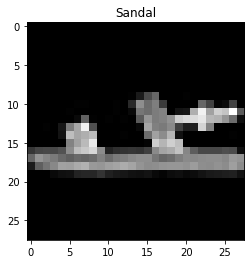

In [ ]:
ind = random.randint(0, len(x_train)-1)
plt.imshow(x_train[ind], cmap="Greys_r")
plt.title(class_labels[y_train[ind]])
plt.show()

In [ ]:
# from IPython.core.pylabtools import activate_matplotlib
model = keras.Sequential([
        keras.Input(shape=(28,28,1)),
        keras.layers.Rescaling(scale=1./255),
        keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Flatten(),

        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics="accuracy")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)         

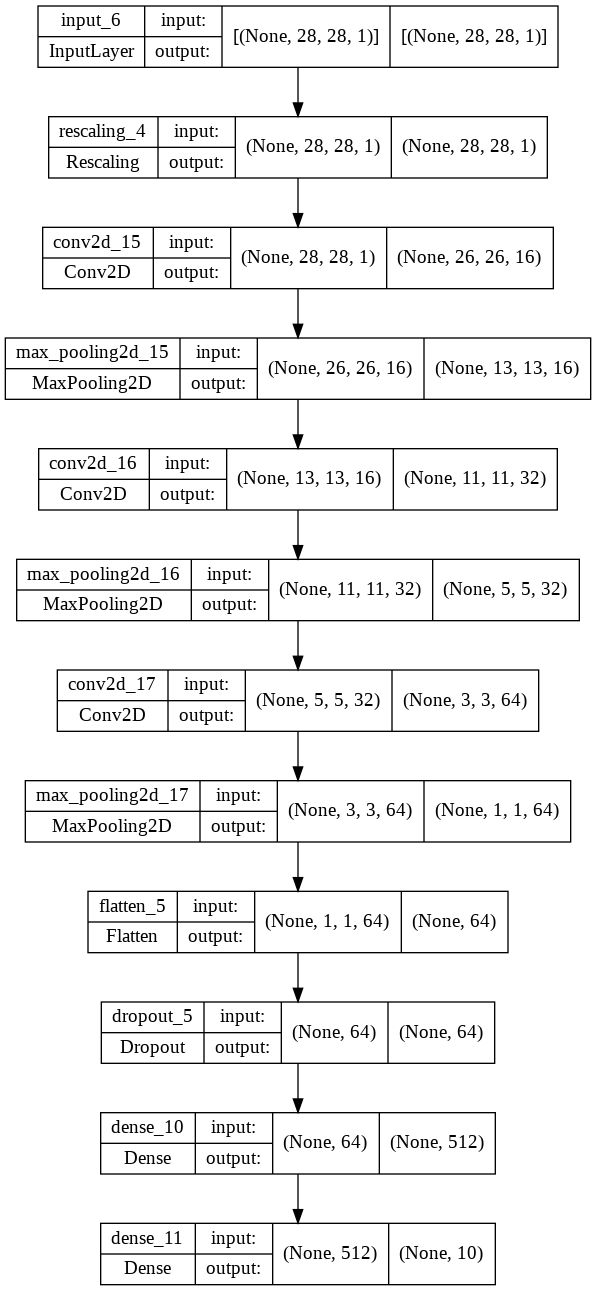

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(x_train, train_labels, epochs=15, batch_size=48, validation_split=0.1)

Epoch 1/15
1125/1125 [==============================] - 4s 4ms/step - loss: 0.4642 - accuracy: 0.8301 - val_loss: 0.4143 - val_accuracy: 0.8440
Epoch 2/15
1125/1125 [==============================] - 4s 4ms/step - loss: 0.4158 - accuracy: 0.8465 - val_loss: 0.3848 - val_accuracy: 0.8522
Epoch 3/15
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3887 - accuracy: 0.8571 - val_loss: 0.3569 - val_accuracy: 0.8627
Epoch 4/15
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3630 - accuracy: 0.8657 - val_loss: 0.3438 - val_accuracy: 0.8722
Epoch 5/15
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3438 - accuracy: 0.8720 - val_loss: 0.3437 - val_accuracy: 0.8698
Epoch 6/15
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3313 - accuracy: 0.8762 - val_loss: 0.3345 - val_accuracy: 0.8752
Epoch 7/15
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3173 - accuracy: 0.8813 - val_loss: 0.3290 - val_accuracy:

In [ ]:
model.evaluate(x_test, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3226 - accuracy: 0.8843


[0.32264238595962524, 0.8842999935150146]

The model is performing good as it is giving 88% accuracy on the tset dataset. Now let's tune the hyperparameters of our model using the <strong>RandomizedSearchCV</strong> and then update our model.

#Using RandomizedSearchCV for hyperparameter tuning

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from keras import regularizers
from keras.layers import Dense

In [ ]:
def createModel(kernels, dropout):
  model = keras.Sequential()
  model.add(keras.Input(shape=(28, 28, 1)))
  model.add(keras.layers.ZeroPadding2D(padding=2))
  model.add(keras.layers.Rescaling(scale=1./255))

  model.add(keras.layers.Conv2D(kernels, (3,3), activation='relu', padding='same'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  
  model.add(keras.layers.Conv2D(2*kernels, (3,3), activation='relu', padding='same'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  
  model.add(keras.layers.Conv2D(4*kernels, (3,3), activation='relu', padding='same'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(dropout))
  
  model.add(keras.layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-4), activation='relu'))
  model.add(Dense(10, kernel_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-4), activation='softmax'))
  

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics="accuracy")
  return model

In [ ]:
model = KerasClassifier(model=createModel, epochs=10, batch_size=32, verbose=1)
# define the grid search parameters
kernels = [8, 16, 32]
drop = [0.2, 0.4]
param_grid = dict(model__kernels=kernels, model__dropout=drop)

In [ ]:
clf = RandomizedSearchCV(model, param_grid, random_state=0)
search = clf.fit(x_train, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6863 - accuracy: 0.7867
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5008 - accuracy: 0.8459
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4512 - accuracy: 0.8602
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4227 - accuracy: 0.8664
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4002 - accuracy: 0.8730
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3866 - accuracy: 0.8777
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3740 - accuracy: 0.8827
Epoch 8/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3669 - accuracy: 0.8829
Epoch 9/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3562 - accuracy: 0.8867
Epoch 10/10
375/375 [==============================] - 1s 2ms/step
Epoch 1/10
1500

In [ ]:
search.best_params_

{'model__kernels': 32, 'model__dropout': 0.4}

In [ ]:
model = createModel(32, 0.4)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPaddi  (None, 32, 32, 1)        0         
 ng2D)                                                           
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)        

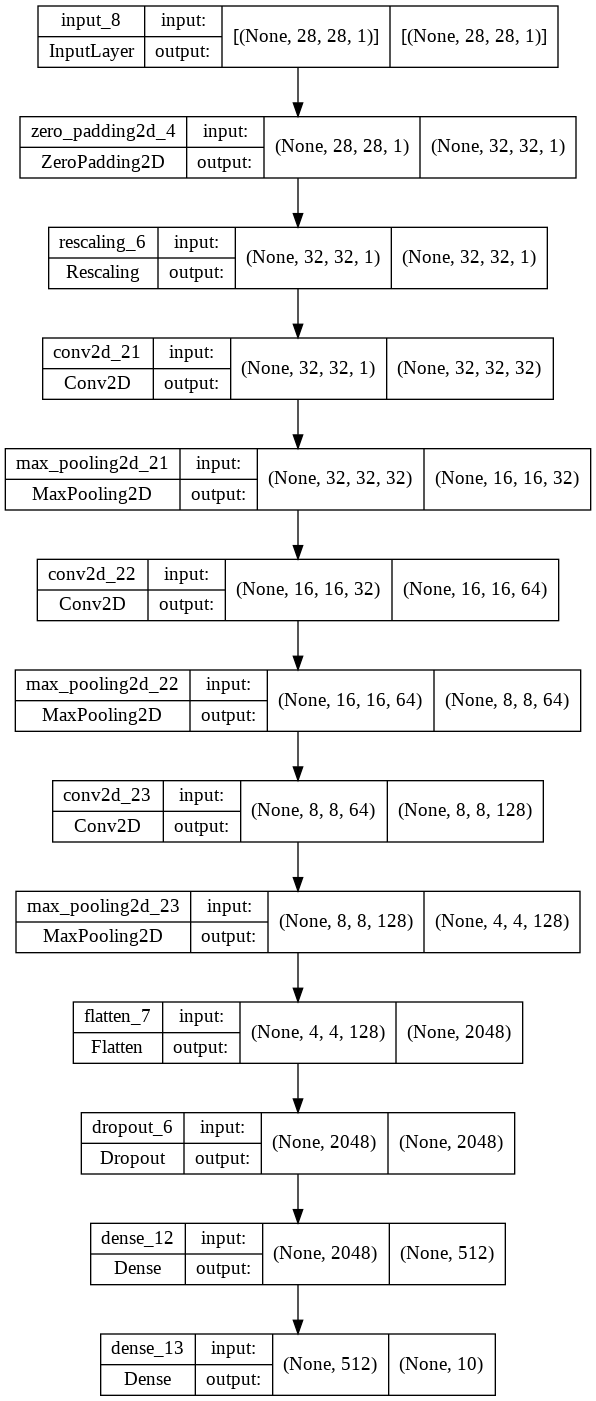

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history = model.fit(x_train, train_labels, epochs=20, batch_size=64, validation_split=0.1, callbacks=[reduce_lr])

Epoch 1/20
844/844 [==============================] - 19s 6ms/step - loss: 0.5481 - accuracy: 0.8289 - val_loss: 0.3877 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 2/20
844/844 [==============================] - 5s 5ms/step - loss: 0.3729 - accuracy: 0.8876 - val_loss: 0.3289 - val_accuracy: 0.9035 - lr: 0.0010
Epoch 3/20
844/844 [==============================] - 5s 5ms/step - loss: 0.3252 - accuracy: 0.9019 - val_loss: 0.3349 - val_accuracy: 0.8937 - lr: 0.0010
Epoch 4/20
844/844 [==============================] - 5s 6ms/step - loss: 0.3014 - accuracy: 0.9107 - val_loss: 0.2914 - val_accuracy: 0.9147 - lr: 0.0010
Epoch 5/20
844/844 [==============================] - 5s 5ms/step - loss: 0.2817 - accuracy: 0.9194 - val_loss: 0.2905 - val_accuracy: 0.9143 - lr: 0.0010
Epoch 6/20
844/844 [==============================] - 4s 5ms/step - loss: 0.2689 - accuracy: 0.9229 - val_loss: 0.2902 - val_accuracy: 0.9147 - lr: 0.0010
Epoch 7/20
844/844 [==============================] - 4s 5ms/step - l

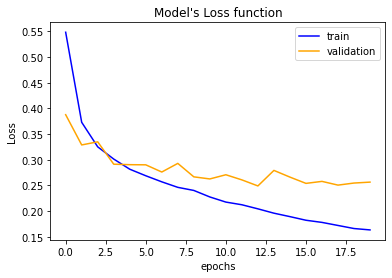

In [ ]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.legend(['train', 'validation'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title("Model's Loss function")
plt.show()

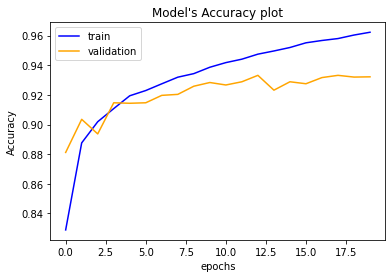

In [ ]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='orange')
plt.legend(['train', 'validation'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("Model's Accuracy plot")
plt.show()

In [ ]:
model.evaluate(x_test, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2759 - accuracy: 0.9290


[0.2759295105934143, 0.9290000200271606]

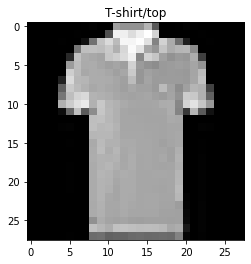

Predicted class: T-shirt/top


In [ ]:
# Let's test our model with a random test image
ind = random.randint(0, len(x_test)-1)
plt.imshow(x_test[ind], cmap="Greys_r")
plt.title(class_labels[y_test[ind]])
plt.show()

y = model.predict(np.expand_dims(x_test[ind], [0,-1]))
print("Predicted class: {}".format(class_labels[np.argmax(y)]))

# Results


---
We can see that the performance of our model increases by using the values of hyperparameters that we obtained using the <strong>RandomizedSearchCV</strong>. Our new model outperforms the previous one.